# Домашнее задание

Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness
Дополнительно будет выложен в ЛК
В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

**1. Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?  
a. Построить точечный график  
b. Рассчитать коэффициенты корреляции Пирсона и Спирмена  
c. Построить модель линейной регрессии  
d. Рассчитать коэффициент детерминации  
e. Вывести график остатков**

**2. Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?  
a. Разделить данные на 2 группы  
b. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности**

In [17]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [3]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


**a. Построить точечный график**

Text(0, 0.5, 'жесткость воды')

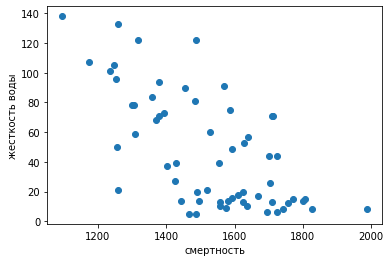

In [4]:
plt.scatter(df['mortality'], df['hardness'])
plt.xlabel('смертность')
plt.ylabel('жесткость воды')

**b. Рассчитать коэффициенты корреляции Пирсона и Спирмена**

In [5]:
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [6]:
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [9]:
covariance = df[['mortality', 'hardness']].cov().loc['mortality', 'hardness']
variance = statistics.pstdev(df['mortality'])*statistics.pstdev(df['hardness'])
correlation = covariance/variance
print(correlation)

-0.6657627669243172


Корреляция между двумя факторами обратная. Несильно выражена. 

**c. Построить модель линейной регрессии**

In [25]:
X = df[['hardness']].values
Y = df['mortality'].values

In [26]:
#1 способ.
#прямая y=ax+b
model = LinearRegression()
model.fit(X, Y)
model.score(X, Y)

0.4288267193124974

In [27]:
print(f'a-{model.coef_}, b-{model.intercept_}')

a-[-3.22609161], b-1676.3556007011584


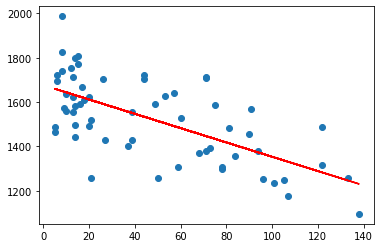

In [31]:
plt.scatter(df['hardness'], df['mortality'])
plt.plot(df['hardness'], model.predict(df[['hardness']]), c='r')

In [ ]:
#2 способ.

In [32]:
X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           1.03e-08
Time:                        21:34:22   Log-Likelihood:                -388.28
No. Observations:                  61   AIC:                             780.6
Df Residuals:                      59   BIC:                             784.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1676.3556     29.298     57.217      0.0

In [33]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [1676.3556007    -3.22609161]
R2:  0.4288267193124973


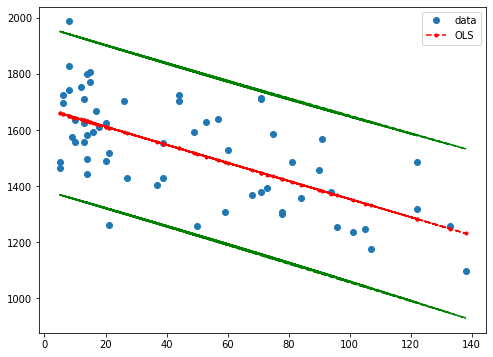

In [34]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X[:,1], Y, 'o', label="data")
ax.plot(X[:,1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X[:,1], iv_u, 'g--')
ax.plot(X[:,1], iv_l, 'g--')
ax.legend(loc='best');

e. Вывести график остатков

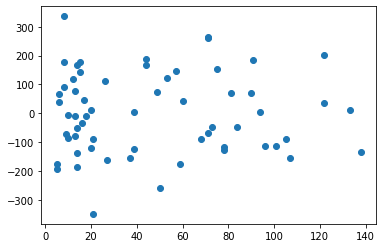

In [35]:
plt.scatter(X[:, 1], results.resid)

Регресионная модель предсказывает, что при изменение содержания кальция на 1 ед, смертность изменится в пределах 1617,73 - 1734.981 человек.

## разделим датасет на Север и Юг

In [38]:
df_south = df[df['location']=='South']
df_north = df[df['location']=='North']

In [41]:
#корреляции Пирсона
print(df_south[['mortality', 'hardness']].corr())

           mortality  hardness
mortality   1.000000 -0.602153
hardness   -0.602153  1.000000


In [42]:
print(df_north[['mortality', 'hardness']].corr())

           mortality  hardness
mortality   1.000000 -0.368598
hardness   -0.368598  1.000000


In [46]:
#корреляции Спирмена
print(df_south[['mortality', 'hardness']].corr(method='spearman'))

           mortality  hardness
mortality   1.000000 -0.595723
hardness   -0.595723  1.000000


In [45]:
print(df_north[['mortality', 'hardness']].corr(method='spearman'))

           mortality  hardness
mortality   1.000000 -0.404208
hardness   -0.404208  1.000000


Text(0, 0.5, 'жесткость воды')

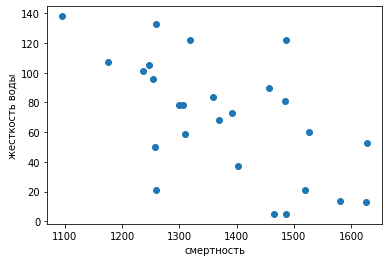

In [47]:
plt.scatter(df_south['mortality'], df_south['hardness'])
plt.xlabel('смертность')
plt.ylabel('жесткость воды')

Text(0, 0.5, 'жесткость воды')

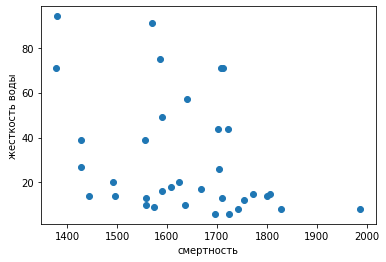

In [48]:
plt.scatter(df_north['mortality'], df_north['hardness'])
plt.xlabel('смертность')
plt.ylabel('жесткость воды')

На Юге более выраженная зависимость.

In [49]:
X1 = df_south[['hardness']].values
Y1 = df_south['mortality'].values

In [51]:
X1 = sm.add_constant(X1)

model1 = sm.OLS(Y1, X1)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     13.65
Date:                Fri, 18 Sep 2020   Prob (F-statistic):            0.00113
Time:                        21:48:40   Log-Likelihood:                -159.06
No. Observations:                  26   AIC:                             322.1
Df Residuals:                      24   BIC:                             324.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1522.8150     45.431     33.519      0.0

In [52]:
print('R2: ', results1.rsquared)

R2:  0.3625885624364602


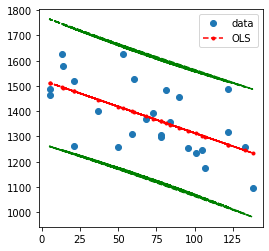

In [57]:
prstd, iv_l, iv_u = wls_prediction_std(results1)

fig, ax = plt.subplots(figsize=(4,4))

ax.plot(X1[:,1], Y1, 'o', label="data")
ax.plot(X1[:,1], results1.fittedvalues, 'r--.', label="OLS")
ax.plot(X1[:,1], iv_u, 'g--')
ax.plot(X1[:,1], iv_l, 'g--')
ax.legend(loc='best');

In [54]:
X2 = df_north[['hardness']].values
Y2 = df_north['mortality'].values

In [55]:
X2 = sm.add_constant(X2)

model2 = sm.OLS(Y2, X2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     5.188
Date:                Fri, 18 Sep 2020   Prob (F-statistic):             0.0293
Time:                        21:50:58   Log-Likelihood:                -218.78
No. Observations:                  35   AIC:                             441.6
Df Residuals:                      33   BIC:                             444.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1692.3128     33.785     50.091      0.0

In [56]:
print('R2: ', results2.rsquared)

R2:  0.13586436642071698


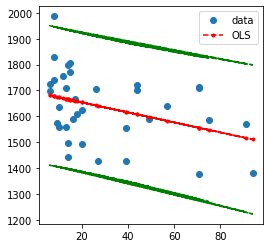

In [58]:
prstd, iv_l, iv_u = wls_prediction_std(results2)

fig, ax = plt.subplots(figsize=(4,4))

ax.plot(X2[:,1], Y2, 'o', label="data")
ax.plot(X2[:,1], results2.fittedvalues, 'r--.', label="OLS")
ax.plot(X2[:,1], iv_u, 'g--')
ax.plot(X2[:,1], iv_l, 'g--')
ax.legend(loc='best');

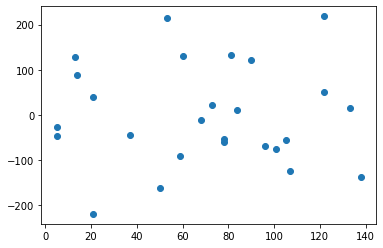

In [59]:
plt.scatter(X1[:, 1], results1.resid)

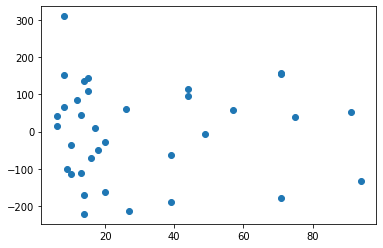

In [60]:
plt.scatter(X2[:, 1], results2.resid)

По результатам разделения датасета, значительных различий нет. На ЮГЕ более выраженная корреляция, но зависимость в обоих случаях обратная  
Регрессионны анализ предсказывает на ЮГЕ доверительный интервал 1429-1616 человек с среднеквадратическим отклонением 0,36. На СЕВЕРЕ 1623-1761 с среднеквадратическим отклонением 0,13. Можно сказать, что на севере модель предсказывает значения более точно, т.к. доверительный интервал уже и ошибки меньше.

Скорее всего такое различие обусловлено большим диапазоном уровня содержания кальция в воде на ЮГЕ - значения смертности более размазаны по прямой содержания кальция.